## 내 구글 드라이브 마운팅
본인 구글 내 데이터 사용

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 선수정보, 연봉, 타자, 투수, 팀 데이터 읽어오기

In [0]:
import pandas as pd
player=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/People.csv')
salary=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
batter=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Batting.csv')
pitcher=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Pitching.csv')
team=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Teams.csv')

## 만든 데이터프레임 변수명 출력

In [0]:
print('선수정보',player.columns,'\n연봉',salary.columns,
'\n타자',batter.columns,'\n투수',pitcher.columns,'\n팀',team.columns)

선수정보 Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object') 
연봉 Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object') 
타자 Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object') 
투수 Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object') 
팀 Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin'

## 만든 데이터프레임 크기 보기

In [0]:
print('선수정보',player.shape,'\n연봉',salary.shape,'\n타자',batter.shape,
'\n투수',pitcher.shape,'\n팀',team.shape)

선수정보 (19617, 24) 
연봉 (26428, 5) 
타자 (105861, 22) 
투수 (46699, 30) 
팀 (2895, 48)


## 선수정보 + 연봉정보 합치기 (선수_연봉)
합친 데이터프레임 이름 : (선수_연봉) ps

In [0]:
ps=pd.merge(salary,player,on='playerID',how='inner')
ps.sort_values(['yearID','playerID'],inplace=True)
print(ps.shape,'\n',ps.columns)

(26428, 28) 
 Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState',
       'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID'],
      dtype='object')


## 타자 정보 + 선수_연봉정보 합치기

In [0]:
bat=pd.merge(ps,batter,on=['yearID','playerID'],how='inner')
print(bat.shape,'\n',bat.columns)

(28294, 48) 
 Index(['yearID', 'teamID_x', 'lgID_x', 'playerID', 'salary', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState',
       'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID', 'stint',
       'teamID_y', 'lgID_y', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')


## 투수 정보 + 선수_연봉정보 합치기

In [0]:
pitch=pd.merge(ps,pitcher,on=['yearID','playerID'],how='inner')
print(pitch.shape,'\n',pitch.columns)

(13365, 56) 
 Index(['yearID', 'teamID_x', 'lgID_x', 'playerID', 'salary', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState',
       'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID', 'stint',
       'teamID_y', 'lgID_y', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts',
       'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK',
       'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')


In [0]:
pitch.head(10)

,yearID,teamID_x,lgID_x,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,stint,teamID_y,lgID_y,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1985,TOR,AL,ackerji01,170000,1958.0,9.0,24.0,USA,TX,Freer,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Acker,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,1,TOR,AL,7,2,61,0,0,0,10,259,86,31,7,43,42,0.268,3.23,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0
1,1985,CHA,AL,agostju01,147500,1958.0,2.0,23.0,P.R.,NaN,Rio Piedras,NaN,NaN,NaN,NaN,NaN,NaN,Juan,Agosto,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,1,CHA,AL,4,3,54,0,0,0,1,181,45,24,3,23,39,0.210,3.58,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0
2,1985,TOR,AL,alexado01,875000,1950.0,9.0,4.0,USA,AL,Cordova,NaN,NaN,NaN,NaN,NaN,NaN,Doyle,Alexander,Doyle Lafayette,190.0,75.0,R,R,1971-06-26,1989-09-27,alexd001,alexado01,1,TOR,AL,17,10,36,36,6,1,0,782,268,100,28,67,142,0.266,3.45,0.0,9,6.0,0,1090.0,0,105,6.0,3.0,15.0
3,1985,SLN,NL,allenne01,750000,1958.0,1.0,24.0,USA,KS,Kansas City,NaN,NaN,NaN,NaN,NaN,NaN,Neil,Allen,Neil Patrick,185.0,75.0,R,R,1979-04-15,1989-09-19,allen001,allenne01,1,SLN,NL,1,4,23,1,0,0,2,87,32,18,3,17,10,0.283,5.59,6.0,1,1.0,1,135.0,13,22,1.0,3.0,3.0
4,1985,SLN,NL,allenne01,750000,1958.0,1.0,24.0,USA,KS,Kansas City,NaN,NaN,NaN,NaN,NaN,NaN,Neil,Allen,Neil Patrick,185.0,75.0,R,R,1979-04-15,1989-09-19,allen001,allenne01,2,NYA,AL,1,0,17,0,0,0,1,88,26,9,1,13,16,0.234,2.76,0.0,2,0.0,0,124.0,10,9,0.0,0.0,3.0
5,1985,PHI,NL,anderla02,250500,1953.0,5.0,6.0,USA,OR,Portland,NaN,NaN,NaN,NaN,NaN,NaN,Larry,Andersen,Larry Eugene,200.0,75.0,R,R,1975-09-05,1994-07-31,andel001,anderla02,1,PHI,NL,3,3,57,0,0,0,3,219,78,35,5,26,50,0.274,4.32,4.0,1,3.0,1,318.0,19,41,3.0,1.0,4.0
6,1985,SLN,NL,andujjo01,1030000,1952.0,12.0,21.0,D.R.,San Pedro de Macoris,San Pedro de Macoris,2015.0,9.0,8.0,D.R.,San Pedro de Macoris,San Pedro de Macoris,Joaquin,Andujar,Joaquin,170.0,72.0,B,R,1976-04-08,1988-09-30,anduj001,andujjo01,1,SLN,NL,21,12,38,38,10,2,0,809,265,102,15,82,112,0.260,3.40,12.0,2,11.0,0,1127.0,0,113,11.0,4.0,32.0
7,1985,OAK,AL,atherke01,107333,1959.0,2.0,19.0,USA,VA,Newport News,NaN,NaN,NaN,NaN,NaN,NaN,Keith,Atherton,Keith Rowe,200.0,76.0,R,R,1983-07-14,1989-08-05,athek001,atherke01,1,OAK,AL,4,7,56,0,0,0,3,314,89,50,17,42,77,0.231,4.30,8.0,2,0.0,0,435.0,21,51,3.0,4.0,4.0
8,1985,CHA,AL,bannifl01,811250,1955.0,6.0,10.0,USA,SD,Pierre,NaN,NaN,NaN,NaN,NaN,NaN,Floyd,Bannister,Floyd Franklin,190.0,73.0,L,L,1977-04-19,1992-08-10,bannf001,bannifl01,1,CHA,AL,10,14,34,34,4,1,0,632,211,114,30,100,198,0.262,4.87,5.0,11,4.0,0,928.0,0,121,9.0,8.0,20.0
9,1985,ATL,NL,barkele01,870000,1955.0,7.0,7.0,USA,KY,Fort Knox,NaN,NaN,NaN,NaN,NaN,NaN,Len,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01,1,ATL,NL,2,9,20,18,0,0,0,221,84,52,10,37,47,0.288,6.35,1.0,3,1.0,0,335.0,1,55,4.0,1.0,4.0


## [HW#1 due 내일 수업전까지]
bat, pitch 데이터프레임에서 stint=2인 선수(시즌 중 이적한 선수임)를 제외하는 코드를 작성하시오.

In [0]:
bat.shape

(28294, 48)

[참고] 타자_선수_연봉 데이터 프레임 - stint 카운트 하면
2= 시즌 중 2번 이적, 3= 시즌 중 3번 이적, 4= 시준 중 4번 이적 그러므로 2,3,4인 선수는 1도 제외하여함

In [0]:
bat['stint'].value_counts()

1    25603
2     2567
3      117
4        7
Name: stint, dtype: int64

예상되는 타자 데이터프레임 행 크기 => 28,294에서 22912

In [0]:
25603-2567-117-7

22912

In [0]:
bat[['playerID','stint']][27415:27425]

,playerID,stint
27415,archech01,1
27416,arciaos01,1
27417,arciaos01,2
27418,arciaos01,3
27419,arciaos01,4
27420,arenano01,1
27421,arrieja01,1
27422,ascheco01,1
27423,avilaal01,1
27424,avilemi01,1


In [0]:
bat2 = bat.drop_duplicates(['playerID','yearID'], keep=False)

In [0]:
bat2[['playerID','stint']][22290:22300]

,playerID,stint
27462,blackch02,1
27463,blancan01,1
27464,blancgr01,1
27465,blantjo01,1
27466,blashja01,1
27467,blazemi01,1
27468,blevije01,1
27469,bogaexa01,1
27470,bolsimi01,1
27471,bourjpe01,1


stint의 변수 중 시즌 중 이동이 있음에도 1로 기입된 선수 36명에 대해 처리 불가능!

In [0]:
pitch[['playerID','stint']][7415:7425]

,playerID,stint
7415,hudsoti01,1
7416,ishiika01,1
7417,isrinja01,1
7418,jarvike01,1
7419,jennija01,1
7420,jensery01,1
7421,jimenjo01,1
7422,johnsja02,1
7423,johnsra05,1
7424,jonesto02,1


In [0]:
pitch2 = pitch.drop_duplicates(['playerID','yearID'], keep=False)
pitch2 = pitch2[(pitch2.stint==1)]
pitch2.shape

(10730, 56)

# #1017@

11.04.화

#과업1

2016년 데이터 가져오기

In [0]:
bat16 = bat2[bat2.yearID == 2016]
bat16.head(5)

,yearID,teamID_x,lgID_x,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
27395,2016,CHA,AL,abreujo02,11666667,1987.0,1.0,29.0,Cuba,Cienfuegos,Cienfuegos,NaN,NaN,NaN,NaN,NaN,NaN,Jose,Abreu,Jose Dariel,255.0,75.0,R,R,2014-03-31,2018-09-16,abrej003,abreujo02,1,CHA,AL,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0
27396,2016,NYA,AL,ackledu01,3200000,1988.0,2.0,26.0,USA,NC,Winston-Salem,NaN,NaN,NaN,NaN,NaN,NaN,Dustin,Ackley,Dustin Michael,205.0,73.0,L,R,2011-06-17,2016-05-29,ackld001,ackledu01,1,NYA,AL,28,61,6,9,0,0,0,4.0,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0
27397,2016,COL,NL,adamecr01,509500,1991.0,7.0,26.0,D.R.,Distrito Nacional,Santo Domingo,NaN,NaN,NaN,NaN,NaN,NaN,Cristhian,Adames,Cristhian Pascual,185.0,72.0,B,R,2014-07-29,2017-04-28,adamc001,adamecr01,1,COL,NL,121,225,25,49,7,3,2,17.0,2.0,3.0,24,47.0,0.0,4.0,3.0,0.0,5.0
27398,2016,SLN,NL,adamsma01,1650000,1988.0,8.0,31.0,USA,PA,Philipsburg,NaN,NaN,NaN,NaN,NaN,NaN,Matt,Adams,Matthew James,245.0,75.0,L,R,2012-05-20,2018-09-28,adamm002,adamsma01,1,SLN,NL,118,297,37,74,18,0,16,54.0,0.0,1.0,25,81.0,1.0,2.0,0.0,3.0,5.0
27399,2016,SFN,NL,adriaeh01,512500,1989.0,8.0,21.0,Venezuela,Miranda,Guarenas,NaN,NaN,NaN,NaN,NaN,NaN,Ehire,Adrianza,Ehire Enrique,170.0,73.0,B,R,2013-09-08,2018-09-28,adrie001,adriaeh01,1,SFN,NL,40,63,3,16,2,0,2,7.0,0.0,1.0,2,13.0,0.0,2.0,4.0,0.0,0.0


# 과업 2

NL와 AL의 연봉의 차이가 있는지 검정하시오.

In [0]:
bat16.groupby(['lgID_x'])['salary'].mean()

lgID_x
AL    4.880440e+06
NL    4.050789e+06
Name: salary, dtype: float64

In [0]:
#등분산검정
#귀무가설 : NL과 AL의 분산은 같다.
#대립가설 : NL과 AL의 분산은 다르다.(양측검정)
import scipy
from scipy import stats
stats.levene(bat16[bat16.lgID_x=='NL'].salary,bat16[bat16.lgID_x=='AL'].salary)

LeveneResult(statistic=3.6022435285539287, pvalue=0.05809859930964574)

유의확률이 0.05보다 크므로 귀무가설(등분산) 채택. 등분산이다.

귀무가설 : NL과 AL의 연봉은 같다.

대립가설 : NL과 AL의 연봉은 다르다.(양측검정)

In [0]:
from scipy import stats
stats.ttest_ind(bat16[bat16.lgID_x=='NL'].salary,bat16[bat16.lgID_x=='AL'].salary,equal_var=True)

Ttest_indResult(statistic=-1.85527716943194, pvalue=0.06396236065581924)

결론 : 유의확률(0.0639...)이 0.05보다 크므로 귀무가설 채택. 실제 평균은 다르지만 통계적으로는 연봉 차이가 없다.

# 과업3
리그별 연봉 평균, 표준편차 그리기

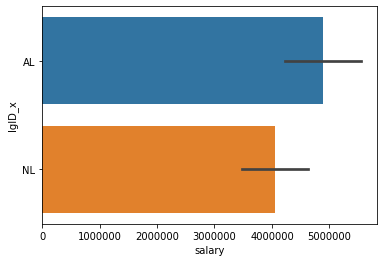

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=bat16.salary, y=bat16.lgID_x, data = bat16)
plt.show()

# 과업4

> AL 소속 선수만 선택하여 bat16al에 저장하시오.

>팀별로 위의 그래프를 그리시오.

>AL 선수 연봉 평균으로 수직참조선을 그리시오.

In [0]:
bat16al = bat16[bat16.lgID_x=='AL']

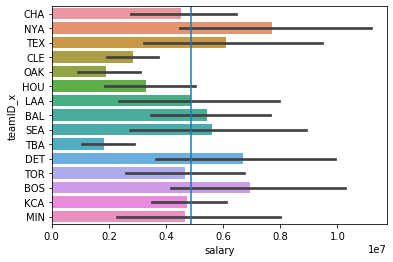

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=bat16al.salary, y=bat16al.teamID_x, data = bat16al)
plt.axvline(x= bat16al.salary.mean() , linestyle= '-')  #, color= 'b'

plt.show()

# 과업5 

팀별 선수연봉 나무상자그림을 그리시오.

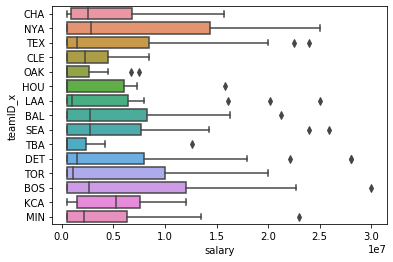

In [0]:
import seaborn as sns
sns.boxplot(x=bat16al.salary, y=bat16al.teamID_x,data=bat16al)

#과업6

>팀별 선수연봉 평균, 표준편차, 95% 신뢰구간을 구하시오.

In [0]:
!pip install researchpy

In [0]:
import researchpy as rp
rp.summary_cont(bat16al.salary.groupby(bat16al.teamID_x))  # SE(표준오차) = SD(표준편차) / 루트N(표본계수)

,N,Mean,SD,SE,95% Conf.,Interval
teamID_x,,,,,,
BAL,26,5.427453e+06,5.913707e+06,1.159773e+06,3.109280e+06,7.745626e+06
BOS,27,6.942315e+06,8.382771e+06,1.613265e+06,3.720082e+06,1.016455e+07
CHA,23,4.521681e+06,4.733344e+06,9.869705e+05,2.543743e+06,6.499620e+06
CLE,25,2.852476e+06,2.485918e+06,4.971836e+05,1.857902e+06,3.847050e+06
DET,29,6.684844e+06,8.785620e+06,1.631449e+06,3.430605e+06,9.939083e+06
HOU,23,3.288413e+06,3.817006e+06,7.959008e+05,1.693388e+06,4.883438e+06
KCA,27,4.741190e+06,3.384641e+06,6.513745e+05,3.440176e+06,6.042204e+06
LAA,21,4.891730e+06,7.088649e+06,1.546870e+06,1.784993e+06,7.998468e+06
MIN,17,4.658306e+06,6.079803e+06,1.474569e+06,1.679202e+06,7.637409e+06


# 과업7

귀무가설 : 모든 팀의 선수연봉은 동일하다.

mu1=mu2=mu3=...=mut


대립가설 : 적어도 한 팀의 선수연봉은 다르다.

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols    ## 집단 세개 이상의 평균비교 (=분산분석)
results = ols('salary~teamID_x',data=bat16al).fit()  #데이터~집단
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.846
Date:                Thu, 07 Nov 2019   Prob (F-statistic):             0.0313
Time:                        04:15:02   Log-Likelihood:                -6084.2
No. Observations:                 357   AIC:                         1.220e+04
Df Residuals:                     342   BIC:                         1.226e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.427e+06   1.22e+06      4.441      0.000    3.02e+06    7.83e+06
teamID_x[T.BOS]  1.515e+06   1.71e+06      0.885      0.377   -1.85e+06    4.88e+06
teamID_x[T.CHA] -9.058e+05   1.78e+06     -0.508      0.612   -4.41e+06     2.6e+06
teamID_x[T.CLE] -2.575e+06   1.75e+06     -1.475      0.141   -6.01e+06    8.59e+05
teamID_x[T.DET]  1.257e+06   1.68e+06      0.747      0.456   -2.05e+06    4.57e+06
teamID_x[T.HOU] -2.139e+06   1.78e+06     -1.199      0.231   -5.65e+06    1.37e+06
teamID_x[T.KCA] -6.863e+05   1.71e+06     -0.401      0.689   -4.05e+06    2.68e+06
teamID_x[T.LAA] -5.357e+05   1.83e+06     -0.293      0.770   -4.13e+06    3.06e+06
teamID_x[T.MIN] -7.691e+05   1.94e+06     -0.396      0.693   -4.59e+06    3.05e+06
teamID_x[T.NYA]  2.277e+06   1.76e+06      1.291      0.198   -1.19e+06    5.75e+06
teamID_x[T.OAK] -3.529e+06   1.94e+06     -1.816      0.070   -7.35e+06    2.94e+05
teamID_x[T.SEA]  1.728e+05   1.81e+06      0.096      0.924   -3.38e+06    3.72e+06
teamID_x[T.TBA] -3.585e+06   1.75e+06     -2.054      0.041   -7.02e+06   -1.51e+05
teamID_x[T.TEX]  6.667e+05   1.76e+06      0.378      0.706    -2.8e+06    4.14e+06
teamID_x[T.TOR] -7.487e+05   1.71e+06     -0.437      0.662   -4.12e+06    2.62e+06
==============================================================================
Omnibus:                       95.758   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.225
Skew:                           1.468   Prob(JB):                     2.69e-40
Kurtosis:                       4.904   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
aov_table=sm.stats.anova_lm(results, typ=2) # df = 집단수 - 1
aov_table

,sum_sq,df,F,PR(>F)
teamID_x,1.003597e+15,14.0,1.845763,0.031322
Residual,1.328255e+16,342.0,NaN,NaN


0.0313은 0.05보다 작으므로 귀무가설을 기각. 즉, 적어도 한팀의 선수 연봉은 다르다.

## 과업 8

>AL과 NL을 선수엽봉차이에 대한 분산분석하시오.

귀무가설 : NL과 AL의  팀별 연봉은 같다.

대립가설 : NL과 AL의 팀별 연봉은 다르다.

In [0]:
results = ols('salary~lgID_x',data=bat16).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.442
Date:                Thu, 07 Nov 2019   Prob (F-statistic):             0.0640
Time:                        03:49:58   Log-Likelihood:                -12380.
No. Observations:                 727   AIC:                         2.476e+04
Df Residuals:                     725   BIC:                         2.477e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.88e+06   3.19e+05     15.298      0.000    4.25e+06    5.51e+06
lgID_x[T.NL] -8.297e+05   4.47e+05     -1.855      0.064   -1.71e+06    4.83e+04
==============================================================================
Omnibus:                      284.427   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.135
Skew:                           1.967   Prob(JB):                    3.07e-189
Kurtosis:                       6.630   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
aov_table=sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
lgID_x,1.250623e+14,1.0,3.442053,0.063962
Residual,2.634188e+16,725.0,NaN,NaN


0.064는 0.05보다 크므로 귀무가설을 채택. 즉, NL과 AL의 팀별 연봉은 같다.

# 마지막 과업

팀별 선수연봉 쌍체비교를 Tukey 방법으로 나타내시오.


귀무가설 : 그룹1 팀과 그룹2 팀의 선수연봉은 동일하다.

mu1=mu2=mu3=...=mut


대립가설 : 적어도 그룹1 팀과 그룹2 팀의 선수연봉은 다르다.(양측검정)

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(bat16al.salary, bat16al.teamID_x)
print(mc.tukeyhsd())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------
   BAL    BOS  1514862.0684    0.9  -4335531.4039  7365255.5406  False
   BAL    CHA  -905771.9799    0.9  -7000623.7122  5189079.7523  False
   BAL    CLE -2574977.1538    0.9  -8539066.0327   3389111.725  False
   BAL    DET  1257391.0186    0.9  -4493185.2651  7007967.3023  False
   BAL    HOU -2139040.1104    0.9  -8233891.8426  3955811.6219  False
   BAL    KCA   -686263.339    0.9  -6536656.8113  5164130.1332  False
   BAL    LAA   -535723.011    0.9  -6782676.9639  5711230.9419  False
   BAL    MIN  -769147.2715    0.9  -7410228.4694  5871933.9264  False
   BAL    NYA  2276882.2212    0.9  -3750217.8789  8303982.3212  False
   BAL    OAK -3529390.3891  0.886  -10170471.587  3111690.8087  False
   BAL    SEA   172834.9825    0.9  -5995078.9001  6340748.8651  False
   BAL

reject가 모두 False 이므로 귀무가설 채택, 그룹1 팀과 그룹2 팀의 선수연봉은 같다.

결론 : 분산분석 결과 요인 수준에 따른 팀별 평균 차이가 있어도 쌍체 비교에서는 유의한 쌍체 pairwise 없을 수 있음.

전체적으로는 팀별 선수연봉의 차이가 있고, 쌍체비교를 통해 팀별로는 차이가 없음을 알 수 있다.